In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 14.4 USDA Food Database

In [3]:
#importer les données JSON

In [4]:
import json

In [5]:
db = json.load(open('Datasets/Wesm/USDA_Food/database.json'))

In [6]:
type(db)

list

In [7]:
len(db)

6636

In [8]:
#chaque entrée dans db repésente un 'dict' d'un simple aliment

In [9]:
db[0]

{'description': 'Cheese, caraway',
 'group': 'Dairy and Egg Products',
 'id': 1008,
 'manufacturer': '',
 'nutrients': [{'description': 'Protein',
   'group': 'Composition',
   'units': 'g',
   'value': 25.18},
  {'description': 'Total lipid (fat)',
   'group': 'Composition',
   'units': 'g',
   'value': 29.2},
  {'description': 'Carbohydrate, by difference',
   'group': 'Composition',
   'units': 'g',
   'value': 3.06},
  {'description': 'Ash', 'group': 'Other', 'units': 'g', 'value': 3.28},
  {'description': 'Energy',
   'group': 'Energy',
   'units': 'kcal',
   'value': 376.0},
  {'description': 'Water',
   'group': 'Composition',
   'units': 'g',
   'value': 39.28},
  {'description': 'Energy', 'group': 'Energy', 'units': 'kJ', 'value': 1573.0},
  {'description': 'Fiber, total dietary',
   'group': 'Composition',
   'units': 'g',
   'value': 0.0},
  {'description': 'Calcium, Ca',
   'group': 'Elements',
   'units': 'mg',
   'value': 673.0},
  {'description': 'Iron, Fe',
   'group': 

In [10]:
db[0]['nutrients'][0]

{'description': 'Protein',
 'group': 'Composition',
 'units': 'g',
 'value': 25.18}

In [11]:
#on extrait les nutrients

In [12]:
nutrients = pd.DataFrame(db[0]['nutrients'])

In [13]:
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


In [14]:
nutrients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 4 columns):
description    162 non-null object
group          162 non-null object
units          162 non-null object
value          162 non-null float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [15]:
#spécifier les noms des colonnes pour toute la database

In [16]:
info_keys = ['description','group','id','manufacturer']

In [17]:
info = pd.DataFrame(db, columns=info_keys)

In [18]:
info.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [19]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
description     6636 non-null object
group           6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 129.6+ KB


In [20]:
#distribution des groupes de nourriture

In [21]:
info['group'].value_counts()

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Pork Products                        328
Fruits and Fruit Juices              328
Beverages                            278
Soups, Sauces, and Gravies           275
Finfish and Shellfish Products       255
Baby Foods                           209
Cereal Grains and Pasta              183
Ethnic Foods                         165
Snacks                               162
Nut and Seed Products                128
Poultry Products                     116
Sausages and Luncheon Meats          111
Dairy and Egg Products               107
Fats and Oils                         97
Meals, Entrees, and Sidedishes        57
Restaurant Foods                      51
Spices and Herbs

In [22]:
""" Assembler les nutriments de chaque nourriture en un seul tableau : plusieurs steps"""

' Assembler les nutriments de chaque nourriture en un seul tableau : plusieurs steps'

In [23]:
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [24]:
#retirer les duplicats

In [25]:
nutrients.duplicated().sum()

14179

In [26]:
nutrients = nutrients.drop_duplicates()

In [27]:
#renamer les 'description' et 'group' imbriqués
col_mapping = {'description':'food','group':'fgroup'}

In [28]:
info = info.rename(columns=col_mapping,copy=False)

In [29]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
food            6636 non-null object
fgroup          6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 129.6+ KB


In [30]:
col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)

In [31]:
nutrients.shape[0]

375176

In [32]:
ndata = pd.merge(nutrients,info,on='id',how='outer')

In [33]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
nutrient        375176 non-null object
nutgroup        375176 non-null object
units           375176 non-null object
value           375176 non-null float64
id              375176 non-null int64
food            375176 non-null object
fgroup          375176 non-null object
manufacturer    293054 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 17.2+ MB


In [34]:
ndata.iloc[30000]

nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [35]:
result = ndata.groupby(['nutrient','fgroup'])['value'].quantile(0.5)

In [36]:
#plot des valeurs medianes par food group et nutrient type

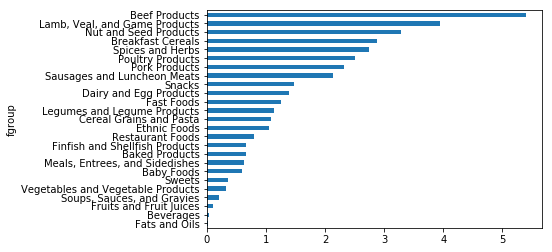

In [38]:
result['Zinc, Zn'].sort_values().plot(kind='barh')

In [39]:
#quel nutriment est plus dense dans quel aliment 

In [40]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

In [41]:
get_maximum = lambda x: x.loc[x.value.idxmax()]
get_minimum = lambda x: x.loc[x.value.idxmin()]

In [42]:
max_foods = by_nutrient.apply(get_maximum)[['value','food']]

In [44]:
max_foods.food = max_foods.food.str[:50]

In [45]:
max_foods.loc['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 